- 부스팅
    - sklearn 제공 부스팅 (AdaBoost, GradientBoost)는 성능 문제로 잘 쓰지 않음
    - XGB, LGBM, CatB가 주로 쓰임

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
from hossam.regression import *

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

In [3]:
origin1 = pd.read_excel("./data/pima_indians_diabetes.xlsx")
origin1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 정제 대상 필드명
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# 0값을 결측치로 대체후 평균으로 다시 치환
df1 = origin1.copy()
df1[zero_features] = df1[zero_features].replace(0, np.nan)
df1_2 = my_replace_missing_value(df1)

# 결과확인
total_count = len(origin1)

for feature in zero_features:
    zero_count = origin1[origin1[feature] == 0][feature].count()
    print(
        "{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %".format(
            feature, zero_count, 100 * zero_count / total_count
        )
    )

print("---" * 30)

for feature in zero_features:
    zero_count = df1_2[df1_2[feature] == 0][feature].count()
    print(
        "{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %".format(
            feature, zero_count, 100 * zero_count / total_count
        )
    )

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %
------------------------------------------------------------------------------------------
Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [5]:
x_train, x_test, y_train, y_test = my_train_test_split(df1_2, "Outcome", scalling=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


- AdaBoost
    - 투입 모델은 기본 세팅을 하지 않으면 깊이 1의 의사결정나무 사용
        - 가능한 타 모델 선택 권장
    - 알고리즘은 "SAMME" 권장 (기본값은 차후 버전 삭제 예정)

In [6]:
support = YjkClassifierSupport()
result_df = yjk_classifier_multi_gridsearch(support, x_train, y_train, x_test, y_test)
result_df

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier', 'LinearSVC', 'SVC', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'CatboostClassifier']
LogisticRegression 모델 소요 시간 : 0:00:02
SGDClassifier 모델 소요 시간 : 0:00:00
KNeighborsClassifier 모델 소요 시간 : 0:00:00
LinearSVC 모델 소요 시간 : 0:00:00
SVC 모델 소요 시간 : 0:00:00
GaussianNB 모델 소요 시간 : 0:00:00
DecisionTreeClassifier 모델 소요 시간 : 0:00:00
RandomForestClassifier 모델 소요 시간 : 0:00:03
AdaBoostClassifier 모델 소요 시간 : 0:00:01
GradientBoostingClassifier 모델 소요 시간 : 0:00:04
CatboostClassifier 모델 소요 시간 : 0:00:05
총 소요 시간 : 0:00:17


,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,"{'subsample': 0.5, 'n_estimators': 100, 'min_s...",0.978827,0.837662
AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=7, random_st...","{'n_estimators': 100, 'learning_rate': 1}",1.000000,0.824675
RandomForestClassifier,"(DecisionTreeClassifier(criterion='entropy', m...","{'n_estimators': 100, 'min_samples_split': 2, ...",0.838762,0.818182
CatboostClassifier,<catboost.core.CatBoostClassifier object at 0x...,{},0.939739,0.811688
LogisticRegression,"LogisticRegression(C=0.1, max_iter=500, n_jobs...","{'penalty': 'l2', 'max_iter': 500, 'C': 0.1}",0.760586,0.805195
SGDClassifier,"SGDClassifier(early_stopping=True, eta0=0.1, l...","{'tol': 0.001, 'penalty': 'l1', 'max_iter': 10...",0.760586,0.798701
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=7)","{'weights': 'uniform', 'p': 2, 'n_neighbors': 7}",0.788274,0.798701
LinearSVC,"LinearSVC(C=0.01, dual=False, penalty='l1', ra...","{'penalty': 'l1', 'max_iter': 1000, 'loss': 's...",0.763844,0.798701
SVC,"SVC(C=10, degree=5, kernel='linear')","{'kernel': 'linear', 'degree': 5, 'C': 10}",0.760586,0.798701


+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.752443 |     0.772727 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.640816 |     0.596774 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.710407 |     0.787234 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |     0.223919 |     0.233645 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.776081 |     0.766355 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |      0.67382 |     0.678899 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.789489 |     0.864287 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--------------

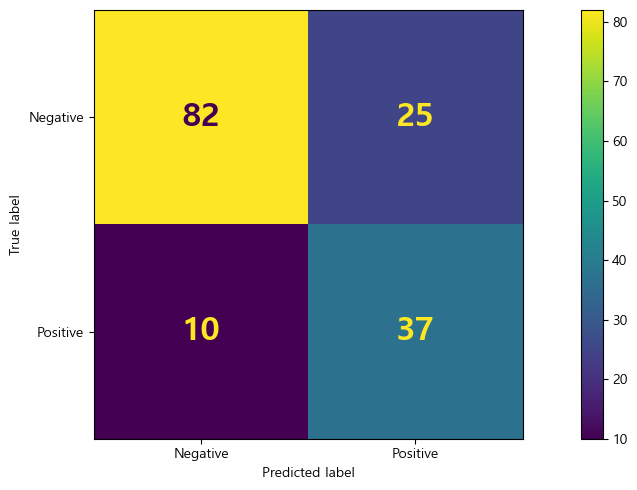

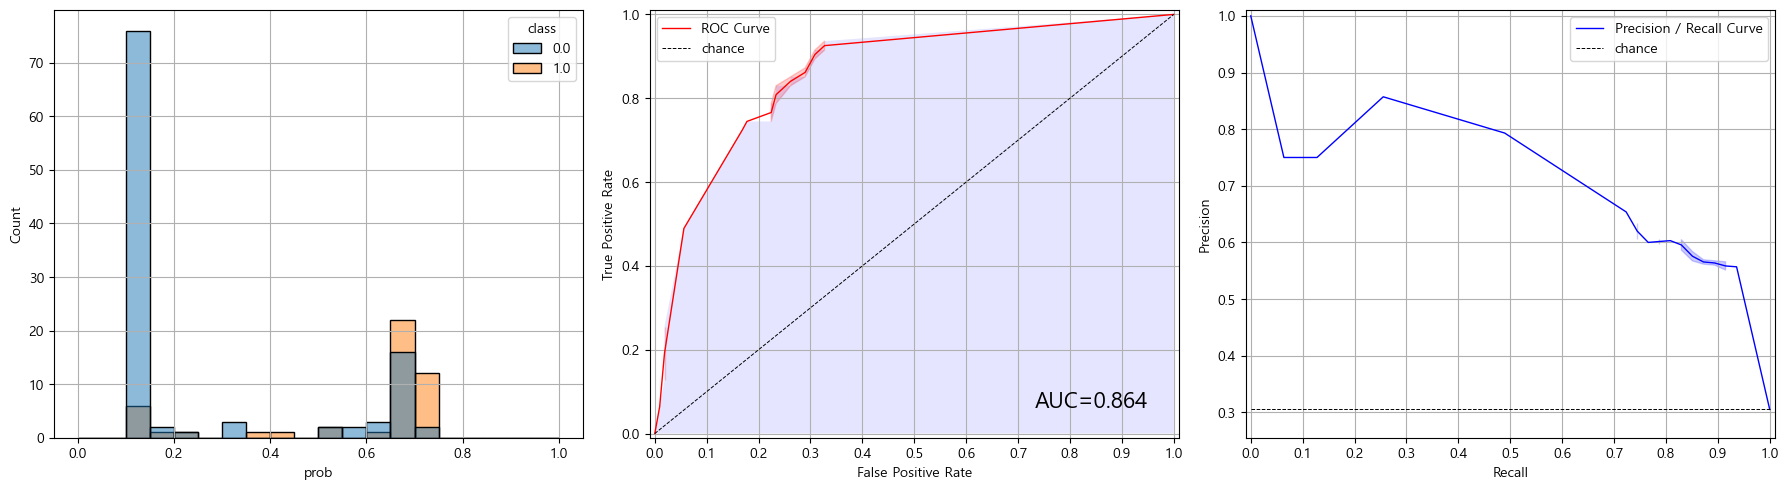

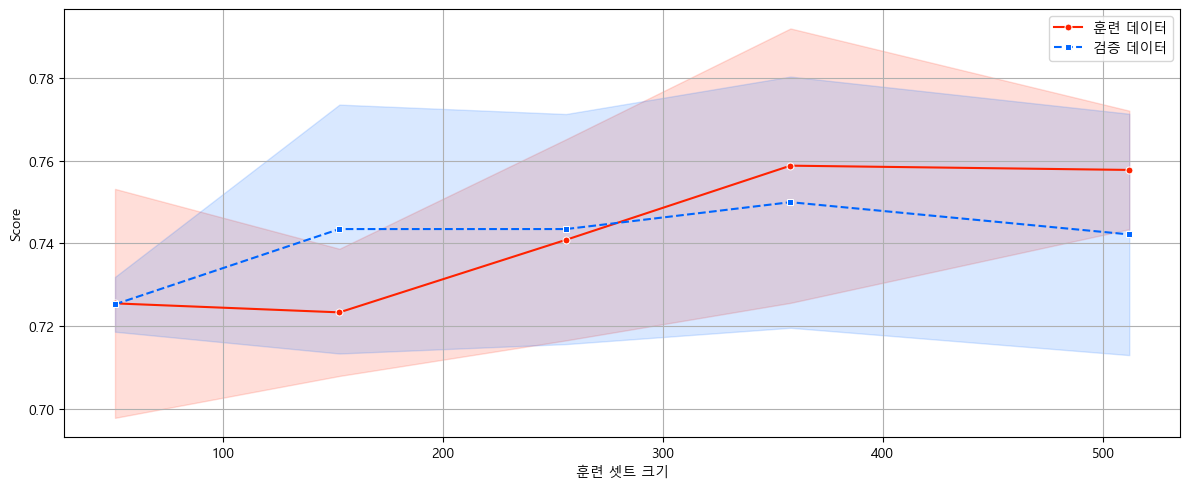

+----+------------+--------------------------+---------+
|    | 종속변수   | 독립변수                 |     VIF |
|----+------------+--------------------------+---------|
|  0 | Outcome    | Pregnancies              | 1.53706 |
|  1 | Outcome    | Glucose                  | 1.33393 |
|  2 | Outcome    | BloodPressure            | 1.25589 |
|  3 | Outcome    | SkinThickness            |  1.5504 |
|  4 | Outcome    | Insulin                  | 1.28711 |
|  5 | Outcome    | BMI                      | 1.52814 |
|  6 | Outcome    | DiabetesPedigreeFunction | 1.05376 |
|  7 | Outcome    | Age                      | 1.64872 |
+----+------------+--------------------------+---------+


In [7]:
ada = AdaBoostClassifier(
    estimator=result_df.loc['LogisticRegression', 'best_model'],
    n_estimators=100,
    learning_rate=0.1,
    algorithm="SAMME",
    random_state=0,
)

ada.fit(x_train, y_train)

my_classification_result(ada, x_train, y_train, x_test, y_test)

my_classification_report(ada, x_train, y_train, x_test, y_test)

- GradientBoost
    - 다양한 손실함수 지원
    - 과적합이 잘 발생하고 요구사양이 높아 타 Boost 모델로 대체되는 추세

+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.916938 |     0.798701 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |        0.925 |     0.666667 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.837104 |     0.680851 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0381679 |     0.149533 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.961832 |     0.850467 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |      0.87886 |     0.673684 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.976466 |      0.85007 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--------------

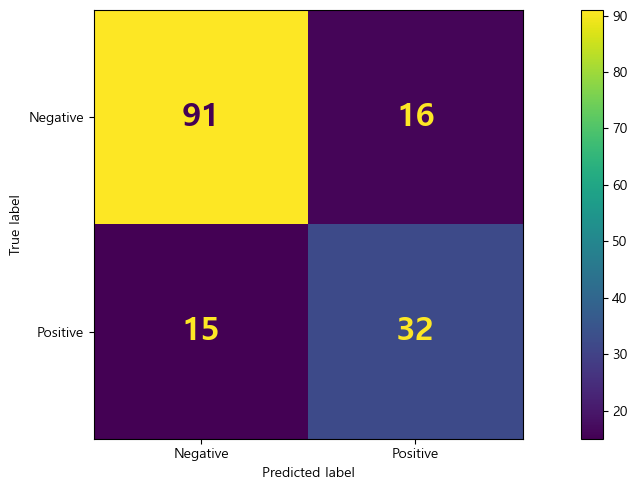

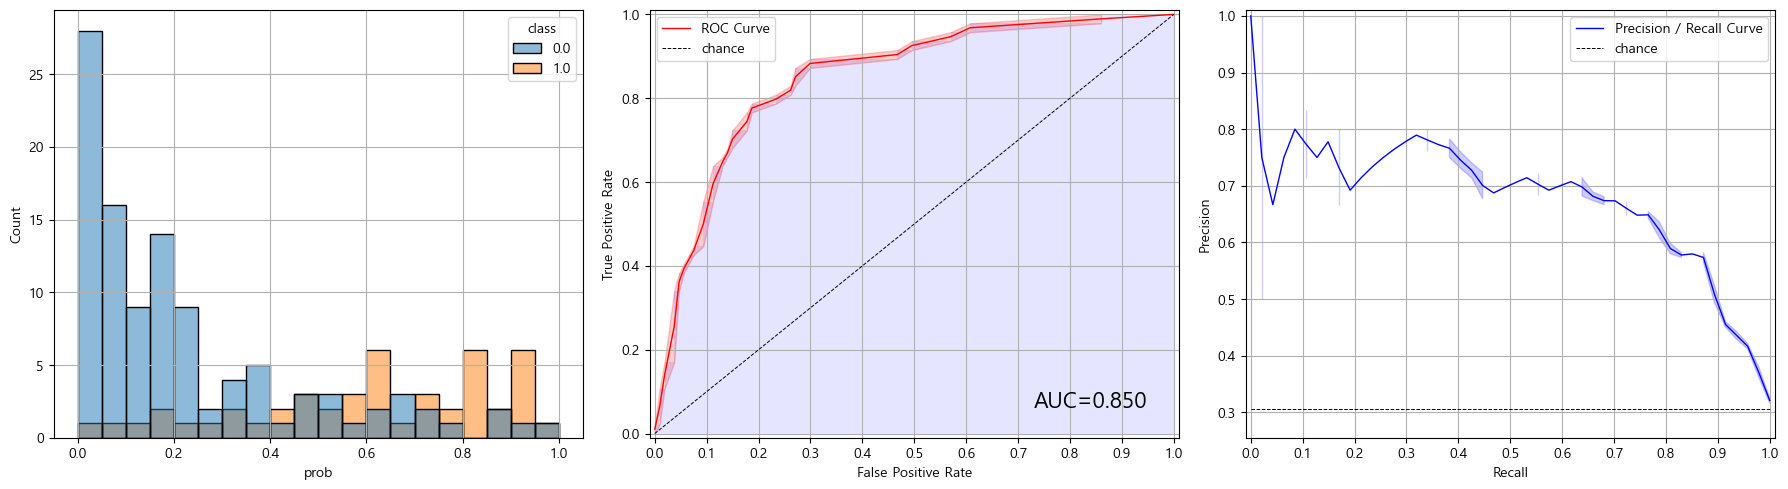

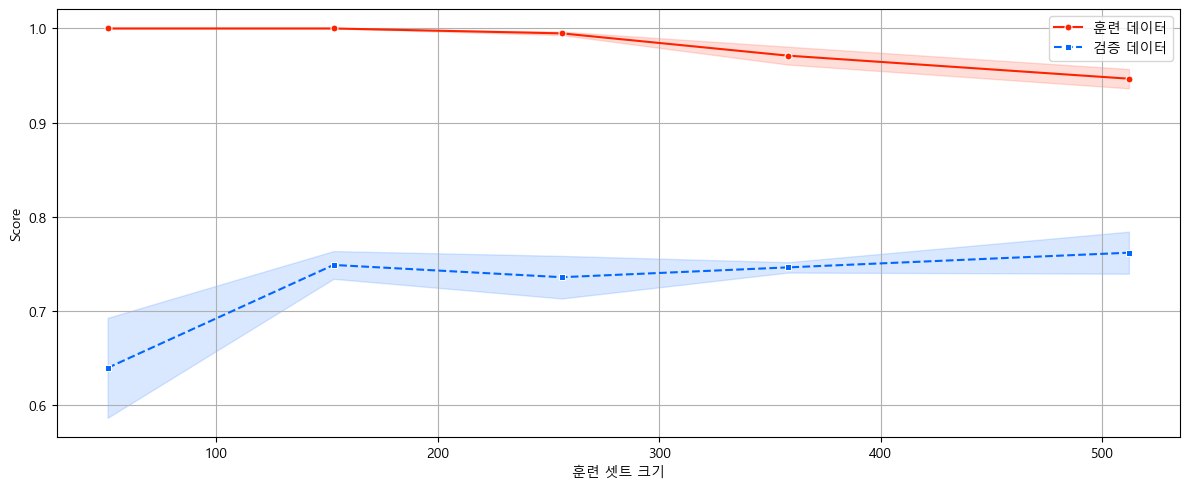

+----+------------+--------------------------+---------+
|    | 종속변수   | 독립변수                 |     VIF |
|----+------------+--------------------------+---------|
|  0 | Outcome    | Pregnancies              | 1.53706 |
|  1 | Outcome    | Glucose                  | 1.33393 |
|  2 | Outcome    | BloodPressure            | 1.25589 |
|  3 | Outcome    | SkinThickness            |  1.5504 |
|  4 | Outcome    | Insulin                  | 1.28711 |
|  5 | Outcome    | BMI                      | 1.52814 |
|  6 | Outcome    | DiabetesPedigreeFunction | 1.05376 |
|  7 | Outcome    | Age                      | 1.64872 |
+----+------------+--------------------------+---------+


In [8]:
gb = GradientBoostingClassifier(
        loss='log_loss',
        learning_rate=0.1,
        n_estimators=100,
        subsample=1,
        random_state=0)

gb.fit(X=x_train, y=y_train)

my_classification_result(estimator=gb, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

my_classification_report(estimator=gb, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)